In [ ]:
from fastai.basics import *
from fastai.vision.all import *
from sklearn import metrics

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from my_utils import dotdict
from wandb_sweep import get_dls, get_learner
from model_eval import get_preds, plot_CM, plot_CM_PR, plot_top_losses_glitches

In [ ]:
import wandb

api = wandb.Api()

In [ ]:
sweep_id = "1cesj6eh"
sweep = api.sweep(f"ogait/thesis_gravity_spy/{sweep_id}")
best_run_config = sweep.best_run().config

wandb: Sorting runs by -summary_metrics.combined_f1_time


In [ ]:
config = dotdict(best_run_config)
config.inference = True
config.glitches_O3_eval = True
config.glitches_O3_version = 3

In [ ]:
dls, _, n_channels = get_dls(config)
learner = get_learner(config, dls, n_channels)
vocab = list(learner.dls.train_ds.class_dict.keys())
learner.load(f"{sweep_id}_run{config.experiment_no}")

<fastai.learner.Learner>

In [ ]:
preds, targets, soft_preds, y_true, y_pred = get_preds(learner, ds_idx=2)

In [ ]:
cm = metrics.confusion_matrix(y_true, y_pred, labels=np.arange(22))
acc = metrics.accuracy_score(y_true, y_pred) * 100
f1 = metrics.f1_score(y_true, y_pred, average="macro") * 100
top3 = metrics.top_k_accuracy_score(y_true, soft_preds, labels=np.arange(22), k=3) * 100
print(f"Overall accuracy: {acc:.2f}%")
print(f"top3 accuracy: {top3:.2f}%")
print(f"Macro-averaged F1-score: {f1:.2f}%")

Overall accuracy: 62.45%
top3 accuracy: 81.66%
Macro-averaged F1-score: 57.70%


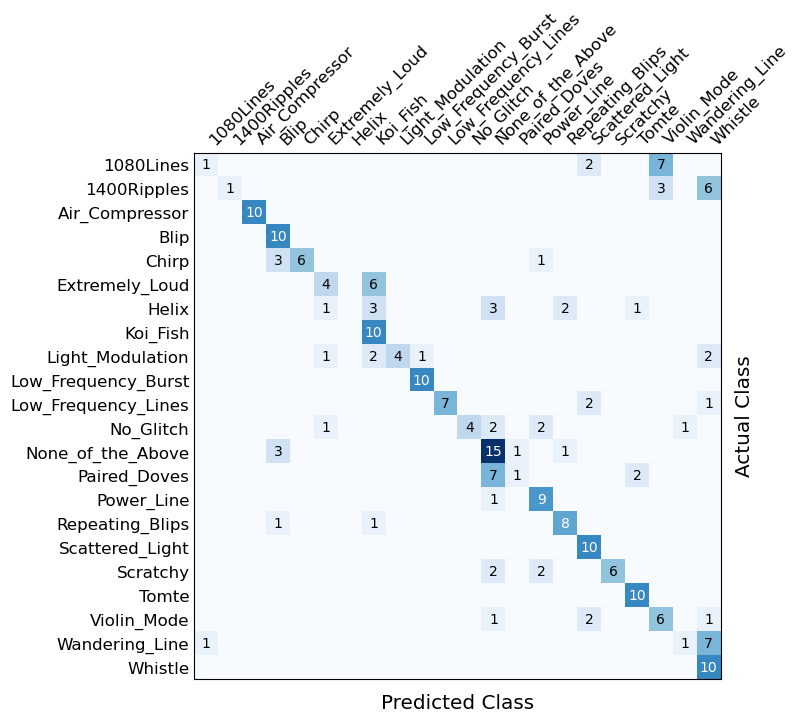

In [ ]:
fig, axes = plot_CM(cm, y_true=y_true, y_pred=y_pred, vocab=vocab, figsize=(8, 8))

In [ ]:
interp = Interpretation.from_learner(learner, ds_idx=2)

In [ ]:
meta_data_path = f"datasets/GlitchesO3/meta_data_O3_v{config.glitches_O3_version}.csv"
meta_data = pd.read_csv(meta_data_path)

In [ ]:
meta_data.loc[10]['gravityspy_id']

gravityspy_id    lS82jwhHrc
ifo                      H1
label               Whistle
Name: 10, dtype: object

In [ ]:
def plot_glitch_preds_by_class(
    interp,
    learner,
    ds_idx=1,
    class_label=None,
    y_preds=None,
    vocab=None,
    meta_data=None
):
    """Plot the predictions for all samples from a given glitch class."""
    plt.rc('axes.spines',top=False,bottom=False,left=False,right=False);
    plt.rc('axes',facecolor=(1,1,1,0),edgecolor=(1,1,1,0));
    plt.rc(('xtick','ytick'),color=(1,1,1,0));
    
    ds = learner.dls.loaders[ds_idx].dataset
    labels = tensor([sample[1] for sample in ds])
    
    idxs = torch.where(labels==class_label)[0]
    losses = interp.losses
    
    fig, axes = plt.subplots(len(idxs), 3, figsize=(8, 24))
    plt.suptitle(f"Gravity Spy label: {vocab[class_label]}", y = 0.9)
    
    for i, idx in enumerate(idxs):
        ax_row = axes[i, :]
        idx = int(idx)
        true_label = vocab[class_label]
        
        title = [f"pred: {vocab[y_preds[idx]]}", f"\nloss: {losses[idx]:.4}", f"\nid: {meta_data.loc[idx]['gravityspy_id']}"]
        
        for channel in (0, 1, 2):
            ax = ax_row[channel]
            ax.imshow(ds[idx][0][channel])
            ax.set_title(title[channel])
     
    return fig, axes

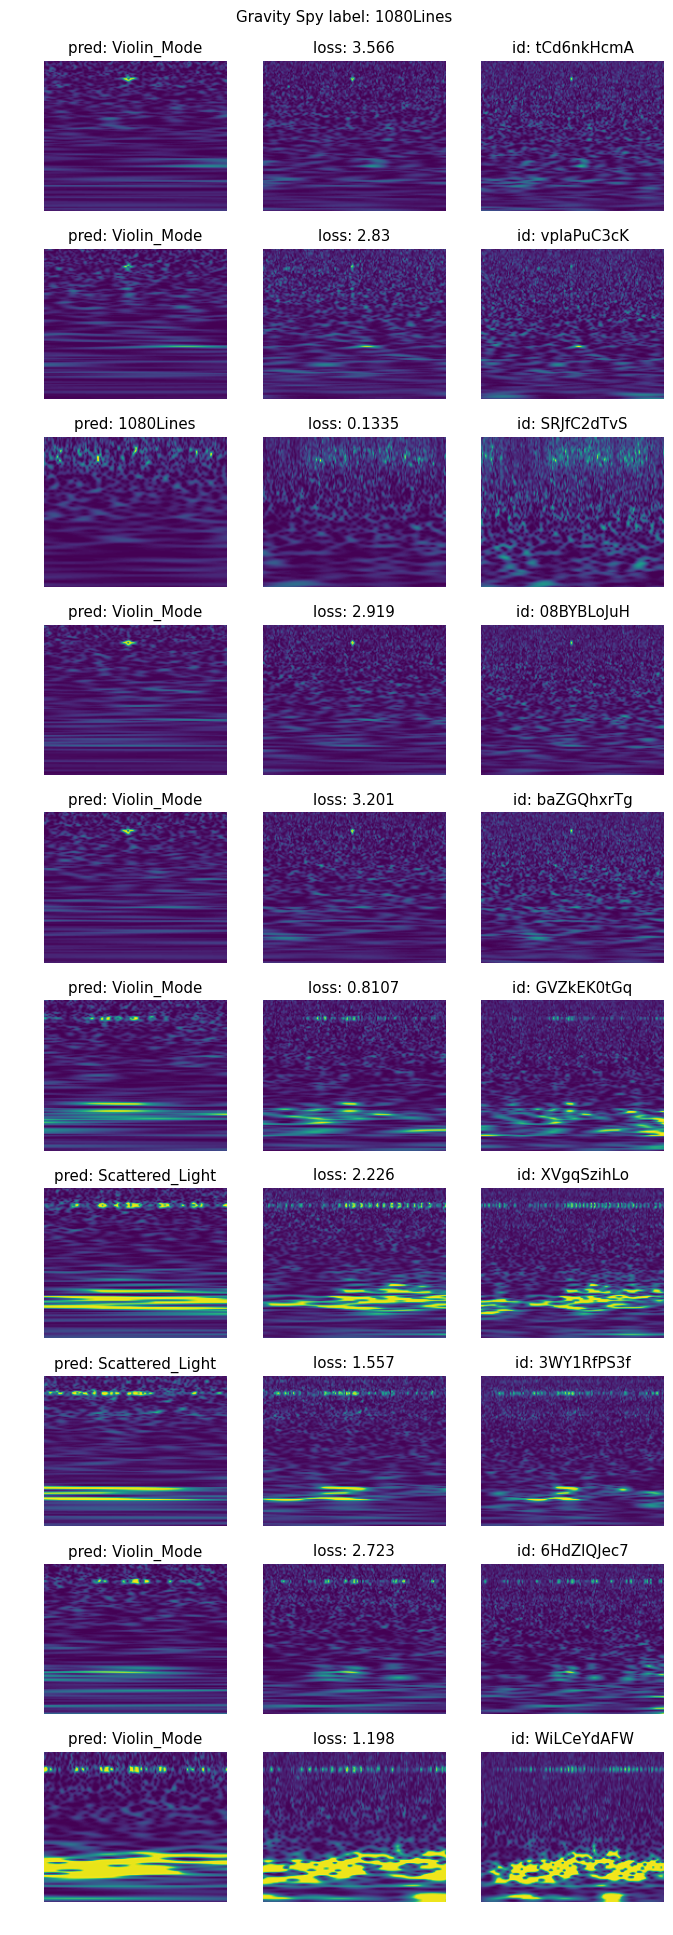

In [ ]:
fig, axes = plot_glitch_preds_by_class(interp, learner, vocab=vocab, ds_idx=2, 
                                       class_label=0, y_preds=y_pred, meta_data=meta_data)

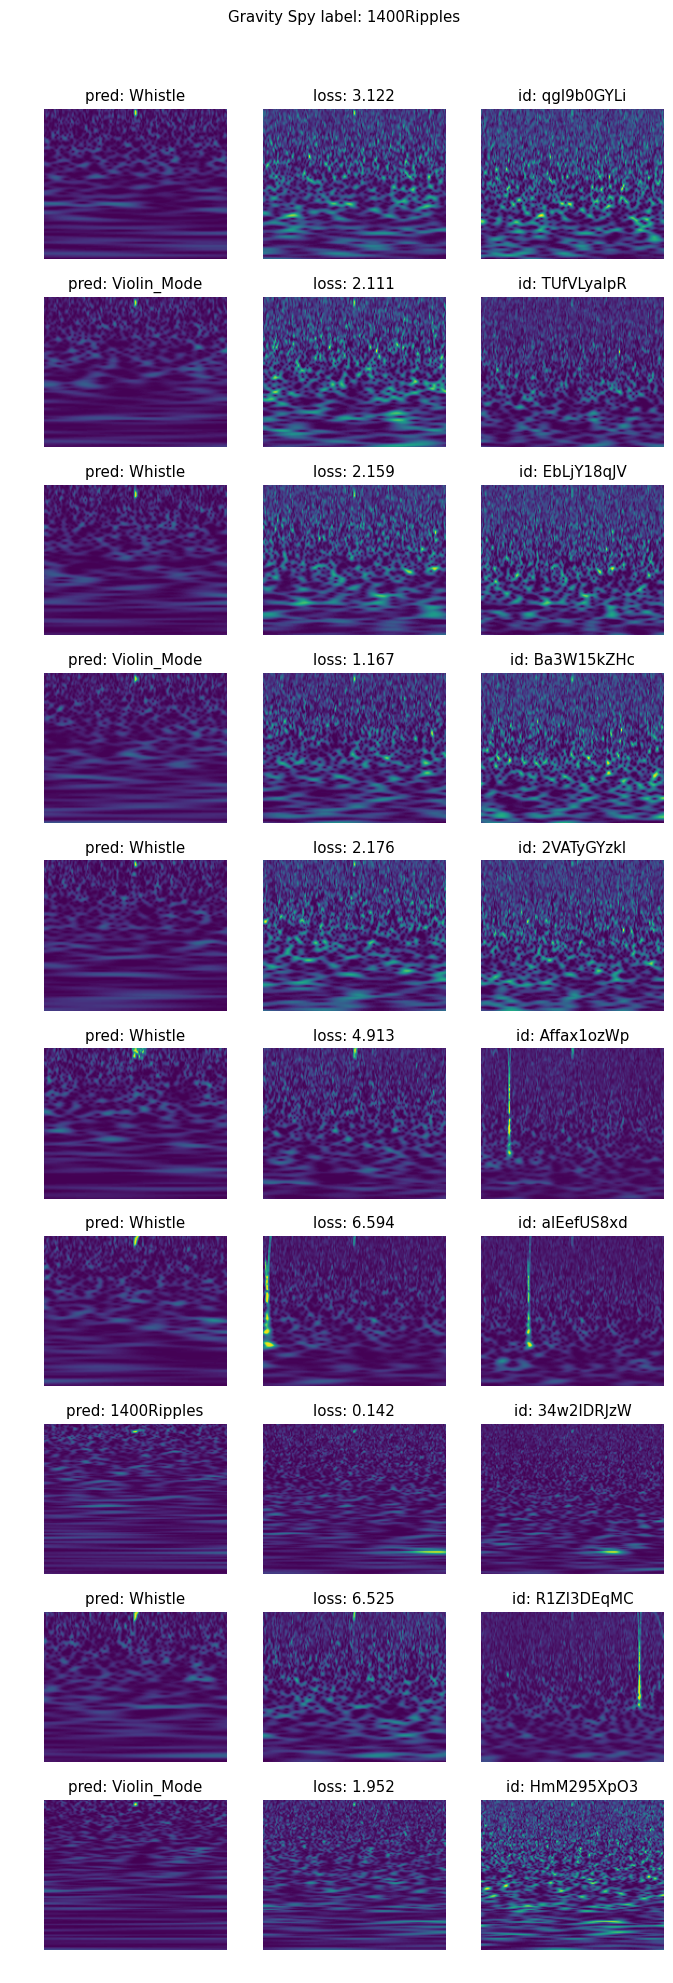

In [ ]:
fig, axes = plot_glitch_preds_by_class(interp, learner, vocab=vocab, ds_idx=2, 
                                       class_label=1, y_preds=y_pred, meta_data=meta_data)

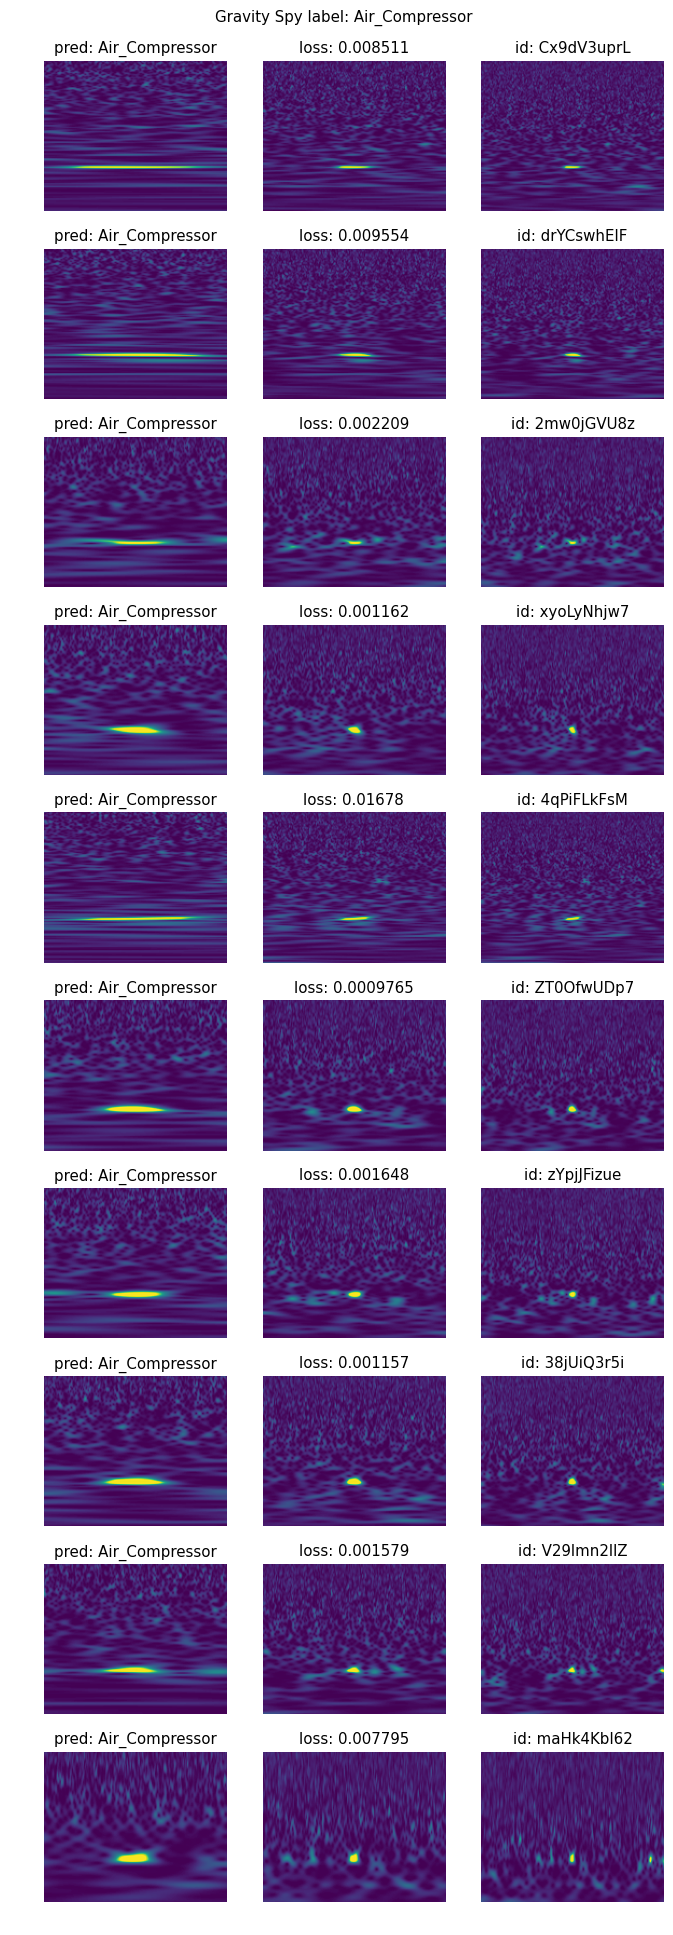

In [ ]:
fig, axes = plot_glitch_preds_by_class(interp, learner, vocab=vocab, ds_idx=2, 
                                       class_label=2, y_preds=y_pred, meta_data=meta_data)

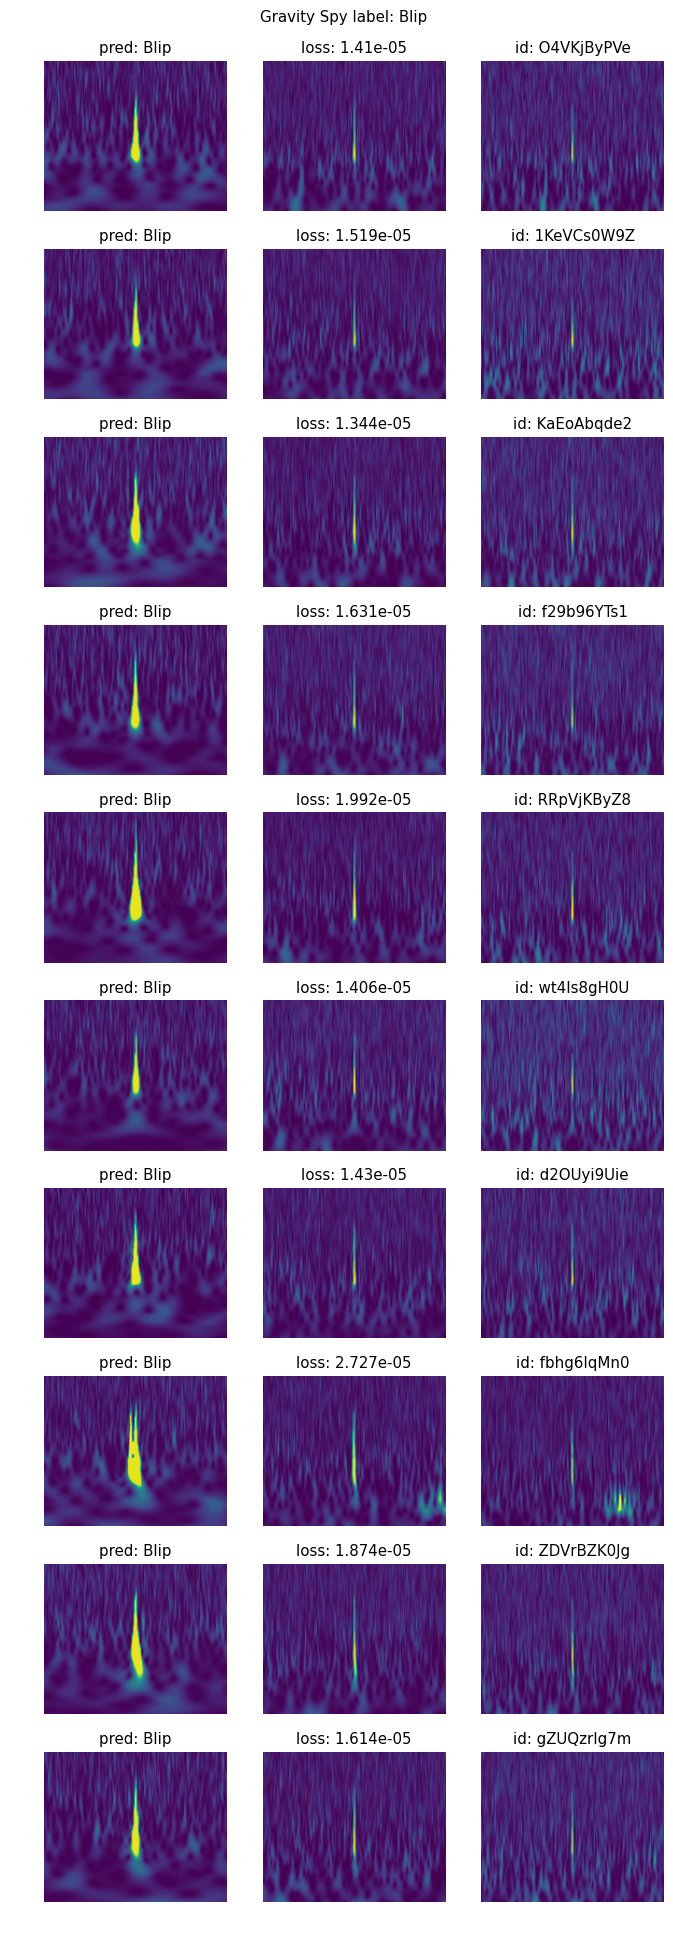

In [ ]:
fig, axes = plot_glitch_preds_by_class(interp, learner, vocab=vocab, ds_idx=2, 
                                       class_label=3, y_preds=y_pred, meta_data=meta_data)

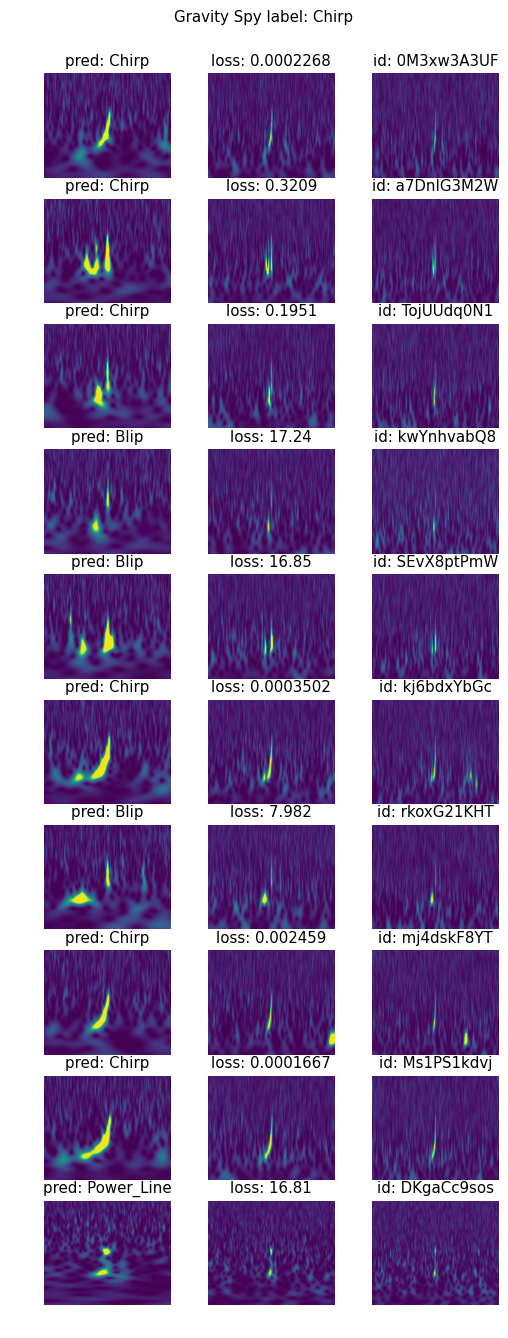

In [ ]:
fig, axes = plot_glitch_preds_by_class(interp, learner, vocab=vocab, ds_idx=2, 
                                       class_label=4, y_preds=y_pred, meta_data=meta_data)

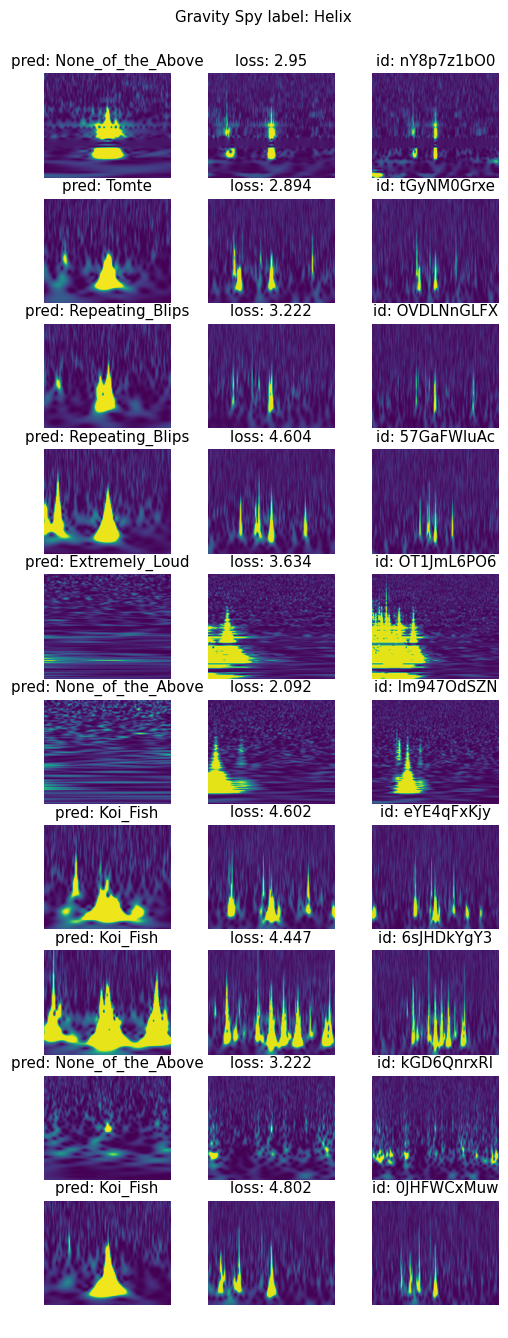

In [ ]:
fig, axes = plot_glitch_preds_by_class(interp, learner, vocab=vocab, ds_idx=2, 
                                       class_label=6, y_preds=y_pred, meta_data=meta_data)